<a href="https://colab.research.google.com/github/minonza/datatrained_projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix  , classification_report
import warnings
warnings.filterwarnings("ignore")

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df=pd.read_csv("/content/drive/MyDrive/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
df=pd.DataFrame(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

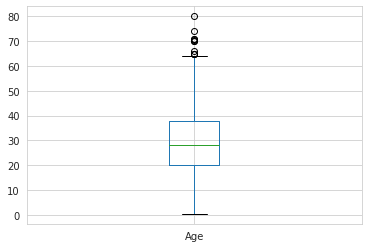

In [80]:
df['Age'].plot.box()

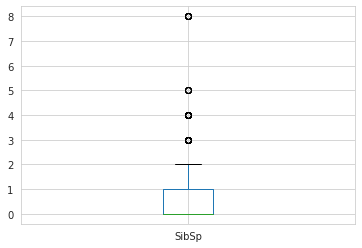

In [81]:
df['SibSp'].plot.box()

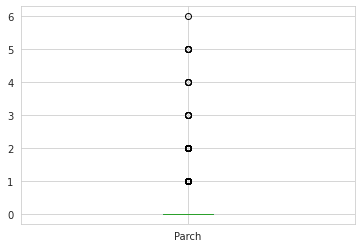

In [82]:
df['Parch'].plot.box()

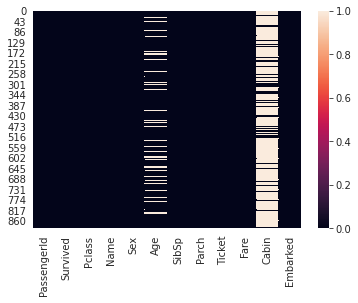

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()
#age and cabin data has maximum null values

In [84]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
 #dropping these columns and cabin has maximum no. of null values
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [88]:
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [89]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [90]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [91]:
df1=df.drop("Survived",axis=1)
df_target=df["Survived"] #seperating target variable

In [92]:
df1.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Pclass,-0.035144,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,0.033207,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.057527,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


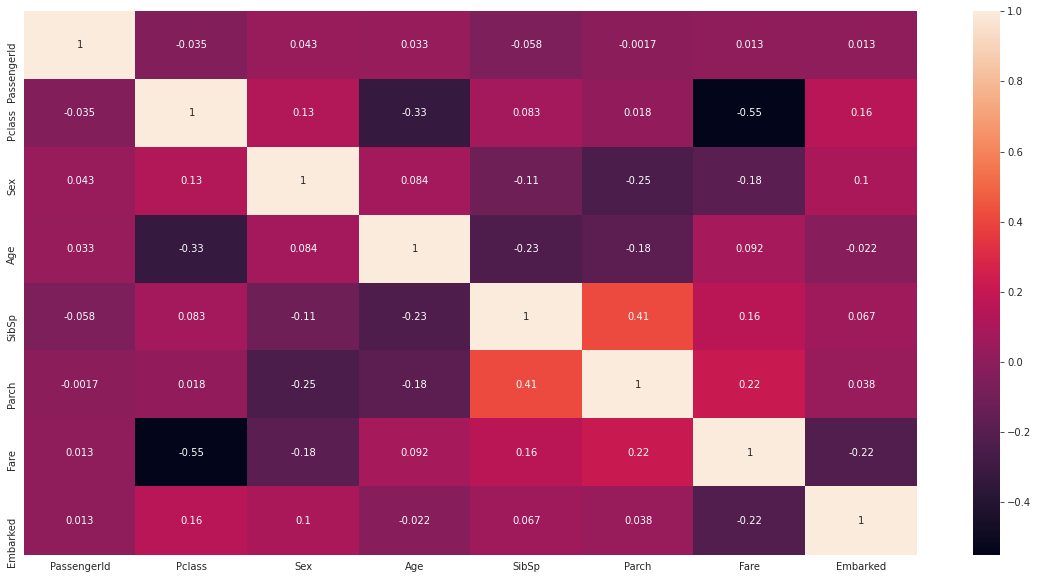

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [94]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.73010796, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58111394],
       [1.72622007, 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.93846038],
       [1.72233219, 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58111394],
       ...,
       [1.72233219, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58111394],
       [1.72622007, 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.93846038],
       [1.73010796, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67867322]])

In [95]:
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 890, 890, 890]), array([0, 1, 2, ..., 5, 6, 7]))


In [96]:
df2=df1[(z<3).all(axis=1)]
df2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [97]:
df2.skew()

PassengerId    0.003454
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.257511
dtype: float64

In [98]:
import numpy as np
for col in df2.columns:
    if df2.skew().loc[col]>0.55:
         df2[col]=np.log1p(df2[col])

In [99]:
df2.skew()

PassengerId    0.003454
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.292829
Parch          1.832391
Fare           0.196364
Embarked      -1.257511
dtype: float64

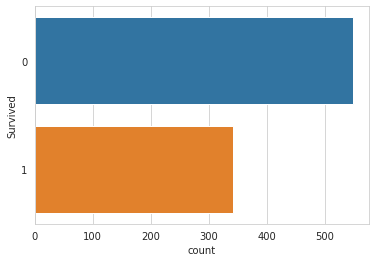

In [100]:
sns.set_style('whitegrid')
sns.countplot(y='Survived',data=df)

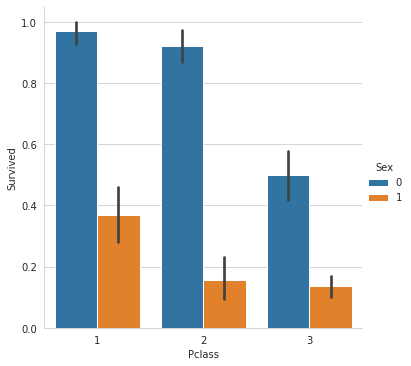

In [101]:
sns.catplot(x="Pclass",y="Survived",hue="Sex",data=df,kind="bar")
plt.show()

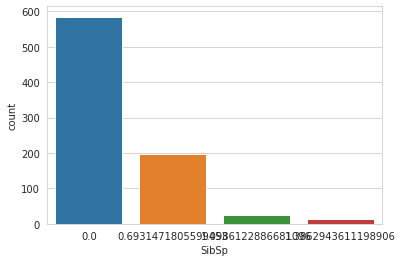

In [102]:
sns.countplot(x='SibSp',data=df2)

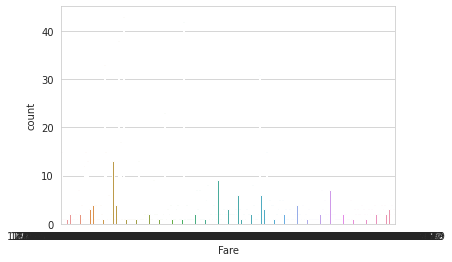

In [103]:
sns.countplot(x='Fare',data=df2)

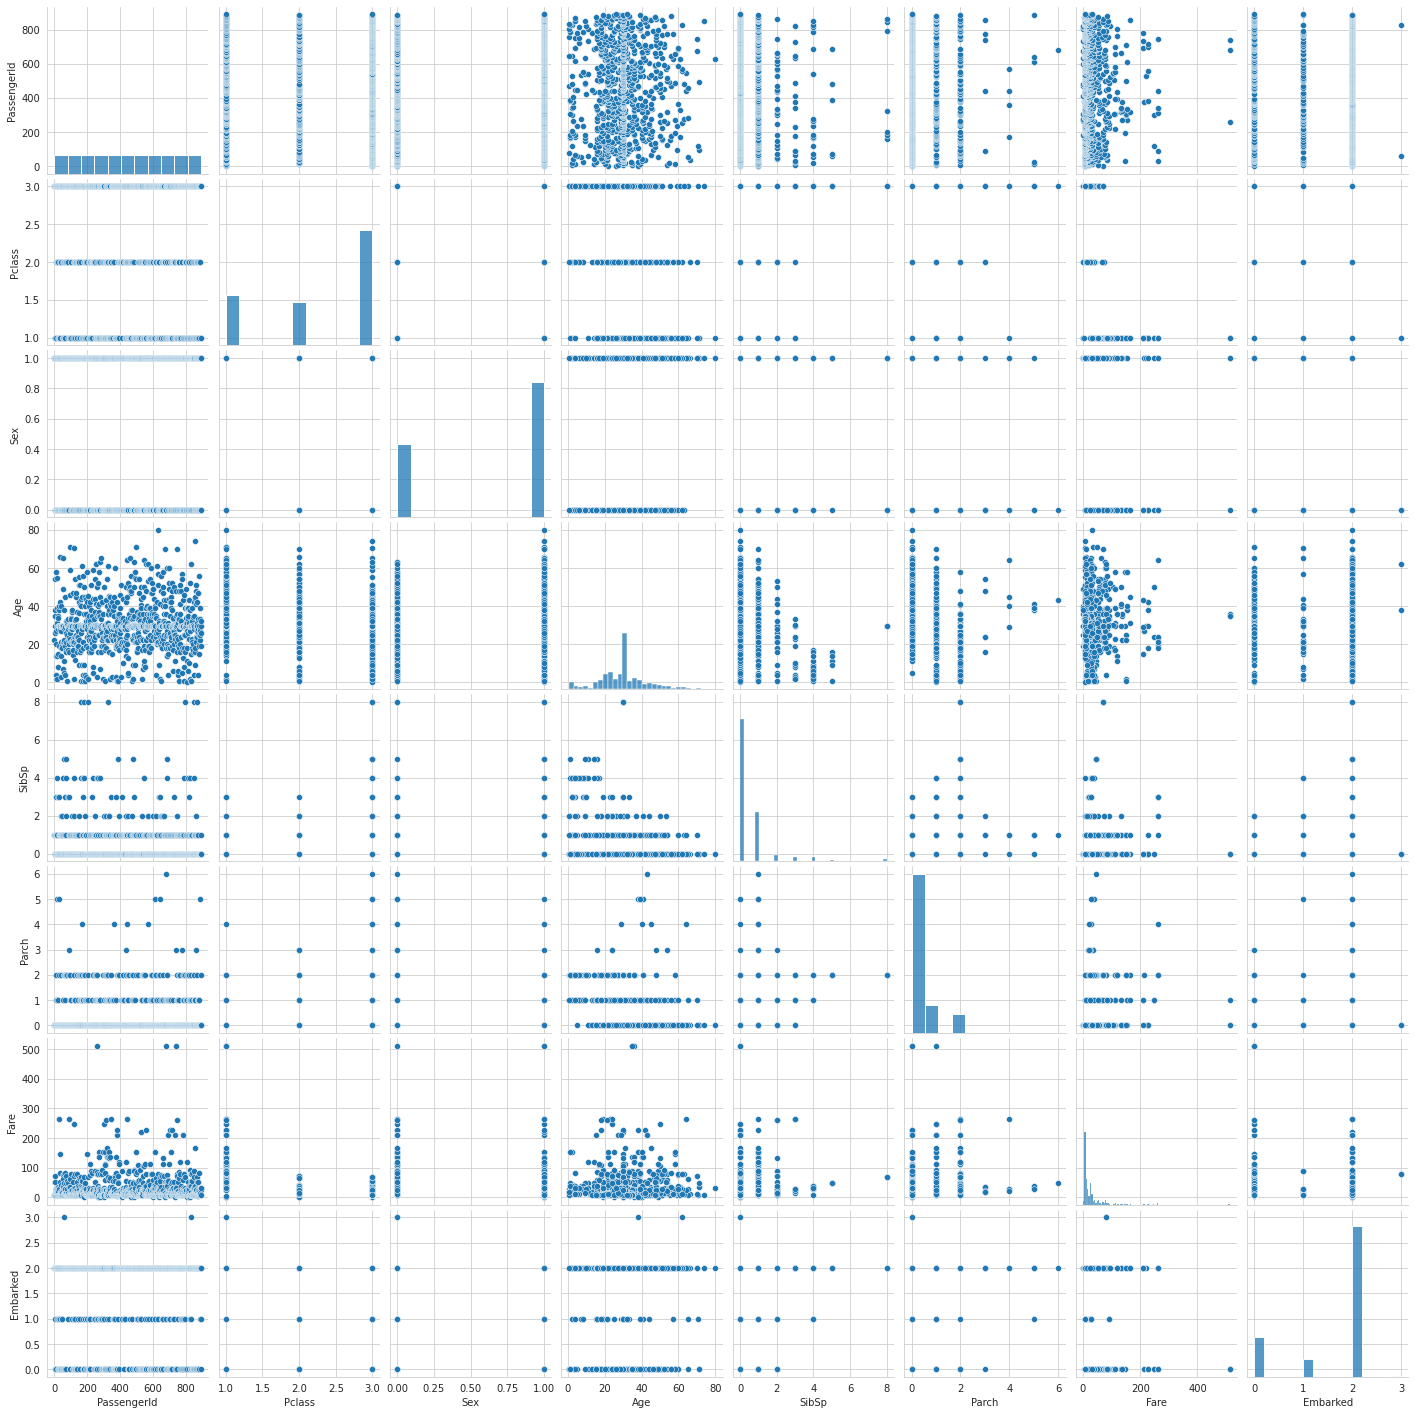

In [104]:
sns.pairplot(df1)

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df2,df_target):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df2,df_target,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [106]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
i=maxr2_score(lreg,df1,df_target)

r2 score corresponding to 42 is 0.10154440154440147
r2 score corresponding to 43 is -0.08484848484848495
r2 score corresponding to 44 is -0.017834065650039088
r2 score corresponding to 45 is 0.28439481665288124
r2 score corresponding to 46 is 0.31153846153846154
r2 score corresponding to 47 is 0.17889908256880727
r2 score corresponding to 48 is 0.11293688054251427
r2 score corresponding to 49 is 0.05789473684210533
r2 score corresponding to 50 is 0.13658288905813665
r2 score corresponding to 51 is -0.050469483568075235
r2 score corresponding to 52 is 0.23196567444355065
r2 score corresponding to 53 is 0.08795923840171638
r2 score corresponding to 54 is 0.09355010660980789
r2 score corresponding to 55 is -0.014097496706192425
r2 score corresponding to 56 is 0.31417624521072796
r2 score corresponding to 57 is 0.07469630395450999
r2 score corresponding to 58 is 0.1362806468440272
r2 score corresponding to 59 is -0.08759493670886065
r2 score corresponding to 60 is 0.0591025641025642
r2 sco

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(df1,df_target)
gknr.best_params_

{'n_neighbors': 22}

In [108]:
knr=KNeighborsRegressor(n_neighbors=22)
i=maxr2_score(knr,df1,df_target)

r2 score corresponding to 42 is 0.09992607719880442
r2 score corresponding to 43 is 0.07560812944391815
r2 score corresponding to 44 is 0.026567129268672884
r2 score corresponding to 45 is 0.0863237039923258
r2 score corresponding to 46 is 0.03330896376350945
r2 score corresponding to 47 is 0.059708577494232196
r2 score corresponding to 48 is 0.08602402600481995
r2 score corresponding to 49 is 0.09956976834967257
r2 score corresponding to 50 is 0.005089232699493795
r2 score corresponding to 51 is 0.0014269886228912565
r2 score corresponding to 52 is 0.012980680793158172
r2 score corresponding to 53 is 0.05582557085519124
r2 score corresponding to 54 is -0.0019149566512186578
r2 score corresponding to 55 is -0.029105282069709082
r2 score corresponding to 56 is 0.07576747094772185
r2 score corresponding to 57 is 0.11355332383493266
r2 score corresponding to 58 is 0.10806555740934753
r2 score corresponding to 59 is -0.0715375562297309
r2 score corresponding to 60 is 0.03667540792540813
r2

In [109]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,df1,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,df1,df_target,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(lreg,df1,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression",cross_val_score(lreg,df1,df_target,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -0.005918643484517849
standard deviation in r2 score for Linear Regression 0.11113961848969113

Mean r2 score for KNN Regression: -0.005918643484517849
standard deviation in r2 score for KNN Regression 0.11113961848969113


In [110]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parametors,cv=10)
clf.fit(df1,df_target)
clf.best_params_

{'alpha': 0.001}

In [111]:
lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,df1,df_target)

r2 score corresponding to 42 is 0.4374744789453344
r2 score corresponding to 43 is 0.22228914453714643
r2 score corresponding to 44 is 0.25570377469086447
r2 score corresponding to 45 is 0.46178379041254947
r2 score corresponding to 46 is 0.4699578590144261
r2 score corresponding to 47 is 0.4267609990088215
r2 score corresponding to 48 is 0.3649601316671893
r2 score corresponding to 49 is 0.44179413893128927
r2 score corresponding to 50 is 0.3747881738945382
r2 score corresponding to 51 is 0.27100388336572945
r2 score corresponding to 52 is 0.3679719724046506
r2 score corresponding to 53 is 0.3940500146065937
r2 score corresponding to 54 is 0.37208719746645524
r2 score corresponding to 55 is 0.3319557941763652
r2 score corresponding to 56 is 0.4573625362418887
r2 score corresponding to 57 is 0.4211738667390761
r2 score corresponding to 58 is 0.35798881159959095
r2 score corresponding to 59 is 0.26926704532382884
r2 score corresponding to 60 is 0.33232253097905395
r2 score corresponding

In [112]:
print("Mean r2 score for Lasso Regression:",cross_val_score(lreg,df1,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lreg,df1,df_target,cv=5,scoring="r2").std())


Mean r2 score for Lasso Regression: -0.005918643484517849
standard deviation in r2 score for Lasso Regression 0.11113961848969113


In [113]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(df1,df_target)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [114]:

gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,df1,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(lreg,df1,df_target,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.40091467489312216
standard deviation in r2 score for gradient boosting Regression 0.11113961848969113


In [115]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(df1,df_target)
clf.best_params_

{'base_estimator': Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 10}

In [116]:
print("Mean r2 score for ada boosting Regression:",cross_val_score(ada_reg,df1,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting Regression",cross_val_score(ada_reg,df1,df_target,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression: 0.35299003891365555
standard deviation in r2 score for ada boosting Regression 0.08111768533700522


In [117]:
i=maxr2_score(ada_reg,df1,df_target)

r2 score corresponding to 42 is 0.37503574568656883
r2 score corresponding to 43 is 0.2695213748392504
r2 score corresponding to 44 is 0.2250871090732529
r2 score corresponding to 45 is 0.44392727091423634
r2 score corresponding to 46 is 0.4885237701618468
r2 score corresponding to 47 is 0.41968175001437014
r2 score corresponding to 48 is 0.2998360534198856
r2 score corresponding to 49 is 0.4546387063921594
r2 score corresponding to 50 is 0.40205573440821096
r2 score corresponding to 51 is 0.36830816844129144
r2 score corresponding to 52 is 0.3728021041244284
r2 score corresponding to 53 is 0.3622148384034831
r2 score corresponding to 54 is 0.3087948238013185
r2 score corresponding to 55 is 0.3629399213343172
r2 score corresponding to 56 is 0.41903635284614804
r2 score corresponding to 57 is 0.4017344601375963
r2 score corresponding to 58 is 0.3918855560539585
r2 score corresponding to 59 is 0.337061399609647
r2 score corresponding to 60 is 0.24997629189864579
r2 score corresponding to

In [119]:

import joblib
joblib.dump(ada_reg,"titanic_dataset.pkl")

['titanic_dataset.pkl']

In [120]:
['titanic_dataset.pkl']

['titanic_dataset.pkl']